# Training our Fruit Classifer

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
import tensorflow as tf; print(tf.__version__)
import keras; print(keras.__version__)

2.6.4
2.6.0


In [3]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

num_classes = 131
img_rows, img_cols = 32, 32
batch_size = 1024

from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/'
validation_data_dir = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True
#    ,fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
#Training Data    
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
#Validation Data
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [4]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization

### Let's define our model

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (img_rows,img_cols,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=131,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

2022-09-10 19:20:08.717049: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# We use a very small learning rate
#opt = tf.keras.optimizers.RMSprop(
 #   learning_rate=0.0001,
  #  name="rmsprop"
#)
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

nb_train_samples = 67692
nb_validation_samples = 22688
epochs = 100

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 67692 // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 22688 // batch_size)

model.save('fruit_classifier.h5')

import pickle
pickle_out = open('fruit_classifier.pkl','wb')
pickle.dump(history.history,pickle_out)
pickle_out.close()

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-09-10 19:20:14.931632: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
66/66 [==============================] - 479s 7s/step - loss: 3.5066 - accuracy: 0.1417 - val_loss: 2.5898 - val_accuracy: 0.2532
Epoch 2/100
66/66 [==============================] - 146s 2s/step - loss: 2.0020 - accuracy: 0.4075 - val_loss: 1.6330 - val_accuracy: 0.5138
Epoch 3/100
66/66 [==============================] - 143s 2s/step - loss: 1.3877 - accuracy: 0.5744 - val_loss: 1.0742 - val_accuracy: 0.6847
Epoch 4/100
66/66 [==============================] - 151s 2s/step - loss: 1.0365 - accuracy: 0.6762 - val_loss: 0.9511 - val_accuracy: 0.7067
Epoch 5/100
66/66 [==============================] - 143s 2s/step - loss: 0.8483 - accuracy: 0.7304 - val_loss: 0.7932 - val_accuracy: 0.7583
Epoch 6/100
66/66 [==============================] - 142s 2s/step - loss: 0.7101 - accuracy: 0.7736 - val_loss: 0.7244 - val_accuracy: 0.7888
Epoch 7/100
66/66 [==============================] - 141s 2s/step - loss: 0.6314 - accuracy: 0.7951 - val_loss: 0.7101 - val_accuracy: 0.7918
Epoch 

In [8]:

import pickle
pickle_in = open('fruit_classifier.pkl','rb')
history=pickle.load(pickle_in)


### Displaying our Confusion Matrix

In [9]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print(validation_generator.classes)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[164   0   0 ...   0   0   0]
 [  0 141   0 ...   0   0   0]
 [  0   0 160 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.82      1.00      0.90       164
 Apple Crimson Snow       1.00      0.95      0.98       148
     Apple Golden 1       0.84      1.00      0.91       160
     Apple Golden 2       1.00      1.00      1.00       164
     Apple Golden 3       0.91      1.00      0.96       161
 Apple Granny Smith       1.00      1.00      1.00       164
    Apple Pink Lady       0.87      1.00      0.93       152
        Apple Red 1       0.86      1.00      0.93       164
        Apple Red 2       0.88      0.87      0.88       164
        Apple Red 3       0.98      1.00      0.99       144
Apple Red Delicious       1.00      1.00      1.00       166
 Apple Red Yellow 1       1.00      

In [10]:
print(classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

### Testing our fruit classifier

In [11]:
from keras.models import load_model
model = load_model('fruit_classifier.h5')


def print_result(result):
    i,j = np.unravel_index(result.argmax(), result.shape)
    print(f'Prediction: {classes[j]} | Probability: {(result[i,j])} | {i} {j}')   

def predict_image_model(image_path : str) -> np.ndarray:
    img_size = (img_rows, img_cols)
    # load imamge into a 4D Tensor, convert it to a numpy array and expand to 4 dim
    img1 = image.load_img(image_path, target_size = img_size)
    image_tensor = image.img_to_array(img1)
    #print(image_tensor.shape)
    image_tensor = image_tensor/255
    image_tensor = np.expand_dims(image_tensor, axis=0)
    #print(img.shape)
    result = model.predict(image_tensor)*100
    return result

from keras.preprocessing import image
test_img_path_1  = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Cherry Wax Red/191_100.jpg'
test_img_path_2 = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Watermelon/r_95_100.jpg'
test_img_path_3  = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Tomato not Ripened/r_297_100.jpg'
test_img_path_4 = '/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_59.jpg'
test_img_path_5 = '../input/fakefruit/multiface1.jpg'
#result
result = predict_image_model(test_img_path_1)#Cherry Wax Red
print_result(result)
result = predict_image_model(test_img_path_2)#Watermelon
print_result(result)
result = predict_image_model(test_img_path_3)#Tomato not Ripened
print_result(result)
result = predict_image_model(test_img_path_4)#apple_crimson_snow_1
print_result(result)
result = predict_image_model(test_img_path_5)#Not Fruit
print_result(result)



#print(result)
# sorting the list in ascending order
#prime_numbers.sort(reverse=True)
result.sort()
print(result)


#print(new_result[0,0])

# Output: [2, 3, 5, 7, 11]

 


Prediction: Cherry Wax Red | Probability: 100.0 | 0 30
Prediction: Watermelon | Probability: 99.9994888305664 | 0 130
Prediction: Tomato not Ripened | Probability: 94.50260162353516 | 0 128
Prediction: Apple Crimson Snow | Probability: 89.03604888916016 | 0 1
Prediction: Pineapple Mini | Probability: 73.78380584716797 | 0 100
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

In [12]:
data_history = history
data_history['epochs']= [i for i in range(1,epochs+1)]
data_history

{'loss': [3.5066232681274414,
  2.0020334720611572,
  1.3877313137054443,
  1.0364727973937988,
  0.8483278155326843,
  0.7101066708564758,
  0.6313584446907043,
  0.5360000729560852,
  0.48940446972846985,
  0.4346455931663513,
  0.4051211178302765,
  0.3659571409225464,
  0.3348460793495178,
  0.31678327918052673,
  0.30627739429473877,
  0.27170324325561523,
  0.2607675790786743,
  0.2453930824995041,
  0.251878559589386,
  0.22845661640167236,
  0.20864897966384888,
  0.21374811232089996,
  0.18532153964042664,
  0.19149434566497803,
  0.1818057894706726,
  0.1718650758266449,
  0.16376900672912598,
  0.16341540217399597,
  0.14641085267066956,
  0.14005635678768158,
  0.13679201900959015,
  0.14183922111988068,
  0.1260727494955063,
  0.12248426675796509,
  0.1330115646123886,
  0.11170730739831924,
  0.11507173627614975,
  0.11321120709180832,
  0.11185063421726227,
  0.10583945363759995,
  0.09944529831409454,
  0.09834028780460358,
  0.09872815012931824,
  0.09881725162267685,


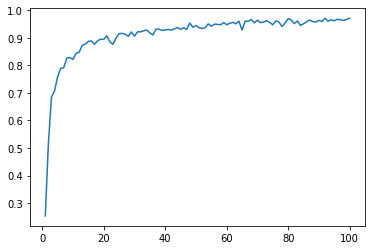

In [13]:
from matplotlib import pyplot as plt
_epochs = data_history['epochs']
_loss = data_history['loss']
_accuracy = data_history['accuracy']
_val_accuracy = data_history['val_accuracy']
_val_loss = data_history['val_loss']

plt.plot(_epochs,_val_accuracy)


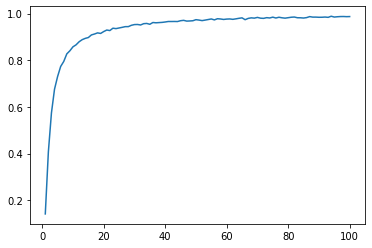

In [14]:
plt.plot(_epochs,_accuracy)